<a href="https://colab.research.google.com/github/Rishu-khurana/Data-Mining/blob/main/DM_Quiz_2_opd20036.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz-2

## Problem-1
### Write a code to calculate confusion matrix

A confusion matrix is a matrix (table) that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

In [ ]:
def con_mat(actual, predicted):
    fp = 0
    fn = 0

    tp = 0
    tn = 0

    for actual, predicted in zip(actual, predicted):
        if predicted == actual: # t?
            if predicted == 1: # tp
                tp = tp+ 1
            else: # tn
                tn = tn + 1
        else: # f?
            if predicted == 1: # fp
                fp = fp +1
            else: # fn
                fn = fn+ 1

    mat = [
        [tn, fp],
        [fn, tp]
    ]


    return mat

In [ ]:
actual = (1,1,1,1,0,0,0)
predicted = (1,0,1,0,1,0,0)

In [ ]:
mat = con_mat(actual, predicted)
mat

[[2, 1], [2, 2]]

Q2.a)

compare these definitions with scikit learn library functions

In [ ]:
#Q1: confusion matrix
from sklearn.metrics import confusion_matrix
actual = (1,1,1,1,0,0,0)
predicted = (1,0,1,0,1,0,0)

print(confusion_matrix(actual, predicted))

[[2 1]
 [2 2]]


## Problem-2
### Write a code to calculate performance matrics

In [ ]:
y_actual = (1,1,1,1,0,0,1,0,1)
y_pred   = (1,0,1,0,1,0,0,1,1)

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)):
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
           return(TP, FP, TN, FN)

In [ ]:
TP, FP, TN, FN

(2, 1, 1, 1)

In [ ]:
 import math

 acc=((TP+TN)/(TP+TN+FP+FN))
 prec=(TP/(TP+FP))
 rec= (TP/(TP+FN))
 f1=(2*prec*rec)/(prec+rec)
 op=acc
 ept=((TP+FP)/(TP+FP+TN+FN))*((TP+FN)/(TP+FP+TN+FN))
 epf=((TN+FN)/(TP+FP+TN+FN))*((TN+FP)/(TP+FP+TN+FN))
 ep=ept+epf
 Kappa=1-((1-op)/(1-ep))
 MCC=((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
 jacc= TP/(TP+FP+FN)

In [ ]:
acc, prec, rec, f1, Kappa, jacc, MCC

(0.2857142857142857,
 0.25,
 0.3333333333333333,
 0.28571428571428575,
 -0.3999999999999997,
 0.16666666666666666,
 -0.4166666666666667)

Q2.b)

compare these definitions with scikit learn library functions

In [ ]:
#Q2: Performance matrics: Accuracy, Precision, Recall, F1-score, Cohan's kappa, mcc, Jaccard score
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(actual,predicted))
print("Precision:", metrics.precision_score(actual,predicted))
print("f1-Score:",metrics.f1_score(actual,predicted))
print("Cohan's kappa:",metrics.cohen_kappa_score(actual,predicted))
print("mcc:", metrics.matthews_corrcoef(actual,predicted))
print("Jaccard score:",metrics.jaccard_score(actual,predicted))

Accuracy: 0.2857142857142857
Precision: 0.25
f1-Score: 0.28571428571428575
Cohan's kappa: -0.40000000000000013
mcc: -0.4166666666666667
Jaccard score: 0.16666666666666666


## Problem-3
### Write a code to draw ROC and AUC

Area Under ROC Curve (or ROC AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [ ]:
def per_curve(Actual, Predicted_prob): # here types belongs on of (ROC, AUC)
    from scipy.io import loadmat
    import matplotlib.pyplot as plt
    from numpy import trapz

    def confusion_metrics(labels,predictions,threshold):
        true_positive=0;
        false_positive=0;
        true_negative=0;
        false_negative=0;
        for i in range(len(labels)):
            if labels[i]==1:
                if predictions[i]>=threshold:
                    true_positive+=1;
                else:
                    false_negative+=1;
            else:
                if predictions[i]>=threshold:
                    false_positive+=1;
                else:
                    true_negative+=1;
        tpf=true_positive/(true_positive + false_negative);
        fpf=false_positive/(false_positive + true_negative);
        return tpf,fpf;

    def results(labels,predictions):
        TPF=[];
        FPF=[];
        THRESHOLD=[];
        i=0;
        #increemental step size for threshold
        dx_step=0.0002;
        while(i<=1):
            threshold=i;
            tpf,fpf=confusion_metrics(labels,predictions,threshold);
            TPF.append(tpf);
            FPF.append(fpf);
            THRESHOLD.append(threshold);
            i+=dx_step;

        plt.plot(FPF,TPF);
        plt.plot(THRESHOLD,THRESHOLD,'--')
        plt.xlabel("False Positive fraction (FPF)--->")
        plt.ylabel("True Positive fraction (TPF)--->")
        plt.title("ROC Curve")
        plt.show()
        area = trapz(TPF, dx=dx_step)
        #print("AUC:Area under the ROC curve is", area)
        return (print("AUC:Area under the ROC curve is", area))
        actual=loadmat('actual.mat');
        predicted=loadmat('predicted.mat');

        labels=actual['target'][:,0];
        predictions=predicted['neuralOut'][:,0];
        return (results(labels,predictions))

In [ ]:
Actual = (0,1,1,0,1,0,0,0,1,0)
Predicted_prob = (0.95,0.65,0.48,0.68,0.75,0.66,0.69,0.59, 0.82, 0.76)
scores = per_curve(Actual,Predicted_prob )


In [ ]:
Actual = (0,1,1,0,1,0,0,0,1,0)
Predicted_prob = (0.95,0.65,0.48,0.68,0.75,0.66,0.69,0.59, 0.82, 0.76)
print("ROC:",metrics.roc_curve(Actual ,Predicted_prob))

ROC: (array([0.        , 0.16666667, 0.16666667, 0.33333333, 0.33333333,
       0.83333333, 0.83333333, 1.        , 1.        ]), array([0.  , 0.  , 0.25, 0.25, 0.5 , 0.5 , 0.75, 0.75, 1.  ]), array([1.95, 0.95, 0.82, 0.76, 0.75, 0.66, 0.65, 0.59, 0.48]))


Q2.c)

compare these definitions with scikit learn library functions

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Actual, Predicted_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.4166666666666667

Text(0.5, 0, 'False Positive Rate')

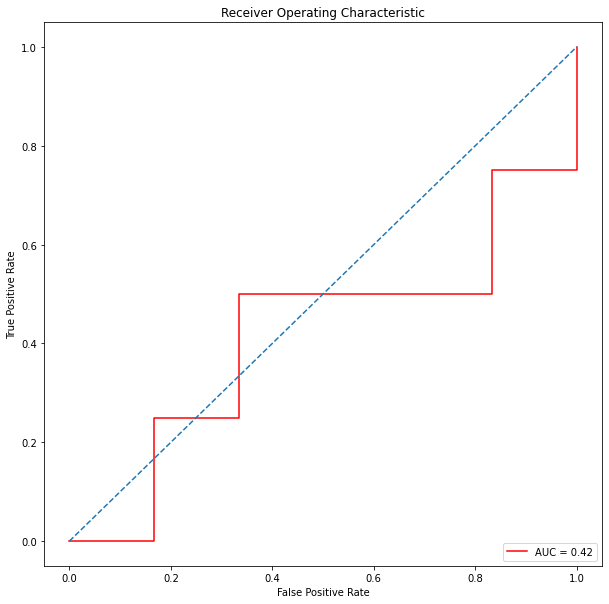

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Problem-4

Write a code to calculate average silhouette score

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

In [ ]:
import sys

In [ ]:
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from itertools import combinations
import numpy as np
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import distance_metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.externals.joblib import Parallel, delayed

def sil_score(mat, labels):
    X=mat
    def silhouette_score_slow(X, labels, metric='euclidean', sample_size=None,
                          random_state=None, **kwds):

        if sample_size is not None:
            random_state = check_random_state(random_state)
            indices = random_state.permutation(X.shape[0])[:sample_size]
            if metric == "precomputed":
                raise ValueError('Distance matrix cannot be precomputed')
            else:
                X, labels = X[indices], labels[indices]
        return np.mean(silhouette_samples_slow(X, labels, metric=metric, **kwds))


    def silhouette_samples_slow(X, labels, metric='euclidean', **kwds):
        metric = distance_metrics()[metric]
        n = labels.shape[0]
        A = np.array([_intra_cluster_distance_slow(X, labels, metric, i)
                      for i in range(n)])
        B = np.array([_nearest_cluster_distance_slow(X, labels, metric, i)
                      for i in range(n)])
        sil_samples = (B - A) / np.maximum(A, B)
        # nan values are for clusters of size 1, and should be 0
        return np.nan_to_num(sil_samples)


    def _intra_cluster_distance_slow(X, labels, metric, i):
        indices = np.where(labels == labels[i])[0]
        if len(indices) == 0:
            return 0.
        a = np.mean([metric(X[i], X[j]) for j in indices if not i == j])
        return a


    def _nearest_cluster_distance_slow(X, labels, metric, i):
        label = labels[i]
        b = np.min(
                [np.mean(
                    [metric(X[i], X[j]) for j in np.where(labels == cur_label)[0]]
                ) for cur_label in set(labels) if not cur_label == label])
        return b


    def silhouette_score_block(X, labels, metric='euclidean', sample_size=None,
                               random_state=None, n_jobs=1, **kwds):

        if sample_size is not None:
            random_state = check_random_state(random_state)
            indices = random_state.permutation(X.shape[0])[:sample_size]
            if metric == "precomputed":
                raise ValueError('Distance matrix cannot be precomputed')
            else:
                X, labels = X[indices], labels[indices]
        return np.mean(silhouette_samples_block(
            X, labels, metric=metric, n_jobs=n_jobs, **kwds))


    def silhouette_samples_block(X, labels, metric='euclidean', n_jobs=1, **kwds):
        A = _intra_cluster_distances_block(X, labels, metric, n_jobs=n_jobs,
                                           **kwds)
        B = _nearest_cluster_distance_block(X, labels, metric, n_jobs=n_jobs,
                                            **kwds)
        sil_samples = (B - A) / np.maximum(A, B)
        # nan values are for clusters of size 1, and should be 0
        return np.nan_to_num(sil_samples)


    def _intra_cluster_distances_block_(subX, metric, **kwds):
        distances = pairwise_distances(subX, metric=metric, **kwds)
        return distances.sum(axis=1) / (distances.shape[0] - 1)


    def _intra_cluster_distances_block(X, labels, metric, n_jobs=1, **kwds):
        intra_dist = np.zeros(labels.size, dtype=float)
        values = Parallel(n_jobs=n_jobs)(
                delayed(_intra_cluster_distances_block_)
                    (X[np.where(labels == label)[0]], metric, **kwds)
                    for label in np.unique(labels))
        for label, values_ in zip(np.unique(labels), values):
            intra_dist[np.where(labels == label)[0]] = values_
        return intra_dist


    def _nearest_cluster_distance_block_(subX_a, subX_b, metric, **kwds):
        dist = pairwise_distances(subX_a, subX_b, metric=metric, **kwds)
        dist_a = dist.mean(axis=1)
        dist_b = dist.mean(axis=0)
        return dist_a, dist_b


    def _nearest_cluster_distance_block(X, labels, metric, n_jobs=1, **kwds):
        inter_dist = np.empty(labels.size, dtype=float)
        inter_dist.fill(np.inf)
        # Compute cluster distance between pairs of clusters
        unique_labels = np.unique(labels)

        values = Parallel(n_jobs=n_jobs)(
                delayed(_nearest_cluster_distance_block_)(
                    X[np.where(labels == label_a)[0]],
                    X[np.where(labels == label_b)[0]],
                    metric, **kwds)
                    for label_a, label_b in combinations(unique_labels, 2))

        for (label_a, label_b), (values_a, values_b) in \
                zip(combinations(unique_labels, 2), values):

                indices_a = np.where(labels == label_a)[0]
                inter_dist[indices_a] = np.minimum(values_a, inter_dist[indices_a])
                del indices_a
                indices_b = np.where(labels == label_b)[0]
                inter_dist[indices_b] = np.minimum(values_b, inter_dist[indices_b])
                del indices_b
        return inter_dist

    if __name__ == '__main__':
        import time

        from sklearn.metrics.cluster.unsupervised import silhouette_score

        np.random.seed(0)
        X = np.random.random((10000, 100))
        y = np.repeat(np.arange(100), 100)
        t0 = time.time()
        s = silhouette_score(X, y)
        t = time.time() - t0
        #print 'Scikit silhouette (%fs): %f' % (t, s)
        t0 = time.time()
        s = silhouette_score_block(X, y)
        t = time.time() - t0
        #print 'Block silhouette (%fs): %f' % (t, s)
        t0 = time.time()
        s = silhouette_score_block(X, y, n_jobs=2)
        t = time.time() - t0
        #print 'Block silhouette parallel (%fs): %f' % (t, s)
        return silhouette_score_block(X, y, n_jobs=2)

In [ ]:
labels=[0,1,0,1,1,1,2,2,2]
mat=[[1,2,11],[1,3,21],[1,5,30],[1,22,10],[1,60,110],[1,50,120],[1,6,40],[1,8,52],[1,20,50]]


In [ ]:
score = sil_score(mat, labels)
print(score)

-0.013991789624238525


Q2.d)

compare these definitions with scikit learn library functions

In [ ]:
#Q4: Calculate average silhouette score
labels=[0,1,0,1,1,1,2,2,2]
mat=[[1,2,11],[1,3,21],[1,5,30],[1,22,10],[1,60,110],[1,50,120],[1,6,40],[1,8,52],[1,20,50]]
c=metrics.silhouette_samples(mat,labels)
d=metrics.silhouette_score(mat,labels)
print(c)
print(d)

[ 0.49231257 -0.87816136 -0.00784445 -0.71369814  0.04869439  0.04100664
  0.25313171  0.61767859  0.56778986]
0.04676775736125422


## Problem-5
### Write a code to implement k-fold validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

In [ ]:
from random import seed
from random import randrange

In [ ]:

def k_fold(data, k):
    dataset_split = list()
    dataset_copy = list(data)
    fold_size = int(len(data) /k)
    for i in range(k):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
#test cross validation split
seed(1)
dataset = [[1,0], [2,3], [4,1], [3,0], [6,0], [7,1], [5,2], [6,8], [4,0], [10,1]]
folds = k_fold(dataset, 4)
print(folds)

[[[4, 1], [2, 3]], [[5, 2], [1, 0]], [[6, 8], [4, 0]], [[10, 1], [7, 1]]]


In [ ]:
labels=[0,1,0,1,1,1,2,2,2,1]
data=[1,2,3,4,5,6,7,8,9,10]
scores = k_fold(data ,10)
scores

[[7], [4], [2], [6], [1], [9], [10], [8], [3], [5]]

Q2.e)

compare these definitions with scikit learn library functions

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
dataset = [[1,0], [2,3], [4,1], [3,0], [6,0], [7,1], [5,2], [6,8], [4,0], [10,1]]

kf = KFold(n_splits=4)
kf.get_n_splits(dataset)
print(kf)
KFold(n_splits=4, random_state=None, shuffle=False)
for train_index, test_index in kf.split(dataset):
 print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=4, random_state=None, shuffle=False)
TRAIN: [3 4 5 6 7 8 9] TEST: [0 1 2]
TRAIN: [0 1 2 6 7 8 9] TEST: [3 4 5]
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
